<a href="https://colab.research.google.com/github/DrMelissaFranklin/DrMelissaFranklin/blob/main/Mel_SQL_1_Chinook_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 3 SQLite - Chinook
"My Lec 2f-sqlite3-chinook.db.ipynb"

ERD for the dataset
https://www.sqlitetutorial.net/wp-content/uploads/2018/03/sqlite-sample-database-diagram-color.pdf

Symbols to interpret the ERD:
https://d2slcw3kip6qmk.cloudfront.net/marketing/pages/chart/erd-symbols/ERD-Notation.PNG

Make an ERD to set up questions:
https://app.diagrams.net/


## Chinook data set

See the lecture on SQLite3 using the Chinook data set to set up the software, database, and tables, as well as for the links to ancillary information about the data set.


In [1]:
# Install the sqlite package for Ubuntu

%%capture
%%bash
apt-get update
apt-get install -y sqlite3

sqlite3 --help
sqlite3 --version

In [2]:
# Download the Chinook sqlite database
%%bash
[ -f chinook.zip ] ||
  curl -s -O https://www.sqlitetutorial.net/wp-content/uploads/2018/03/chinook.zip
unzip -l chinook.zip

Archive:  chinook.zip
  Length      Date    Time    Name
---------  ---------- -----   ----
   884736  2015-11-29 10:53   chinook.db
---------                     -------
   884736                     1 file


In [3]:
!unzip -u chinook.zip # unzip the Chinook sqlite database

Archive:  chinook.zip
  inflating: chinook.db              


#Use SQL queries to pull specific information

###Do NOT pull all the data and then filter using DataFrame methods etc. Make sure and use AT LEAST 13 of the 15 SQL options listed below. (You may have to get creative and come up with more questions to ask/answer.)

In [4]:
# Quick reference guide to all magics
%quickref

In [5]:
# List all line and cell magics available, and status of magics
%lsmagic

Available line magics:
%alias  %alias_magic  %autoawait  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %colors  %conda  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %pip  %popd  %pprint  %precision  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %shell  %store  %sx  %system  %tb  %tensorflow_version  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%bigquery  %%capture  %%debug  %%file  %%html  %%javascript  %%js  %%late

In [6]:
# !: shell commends in Colab;
#ls: list dir;
#-l: long list format;
#a: includes hidden files

# --Returns 1180 kb as the size of the database file
!ls -la

total 1180
drwxr-xr-x 1 root root   4096 Oct 28 00:17 .
drwxr-xr-x 1 root root   4096 Oct 28 00:15 ..
-rw-r--r-- 1 root root 884736 Nov 29  2015 chinook.db
-rw-r--r-- 1 root root 305596 Oct 28 00:17 chinook.zip
drwxr-xr-x 4 root root   4096 Oct 24 13:20 .config
drwxr-xr-x 1 root root   4096 Oct 24 13:20 sample_data


In [7]:
# Names of tables in the database
%%script sqlite3 --column --header chinook.db
.tables

albums          employees       invoices        playlists     
artists         genres          media_types     tracks        
customers       invoice_items   playlist_track


In [8]:
# Schemas for the entire database.
# Schema: the structure of the database, including tables and column names, data types, and relationships.
#Foreign keys are hidden keys.

%%script sqlite3 --column --header chinook.db
.schema

CREATE TABLE IF NOT EXISTS "albums"
(
    [AlbumId] INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
    [Title] NVARCHAR(160)  NOT NULL,
    [ArtistId] INTEGER  NOT NULL,
    FOREIGN KEY ([ArtistId]) REFERENCES "artists" ([ArtistId]) 
		ON DELETE NO ACTION ON UPDATE NO ACTION
);
CREATE TABLE sqlite_sequence(name,seq);
CREATE TABLE IF NOT EXISTS "artists"
(
    [ArtistId] INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
    [Name] NVARCHAR(120)
);
CREATE TABLE IF NOT EXISTS "customers"
(
    [CustomerId] INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
    [FirstName] NVARCHAR(40)  NOT NULL,
    [LastName] NVARCHAR(20)  NOT NULL,
    [Company] NVARCHAR(80),
    [Address] NVARCHAR(70),
    [City] NVARCHAR(40),
    [State] NVARCHAR(40),
    [Country] NVARCHAR(40),
    [PostalCode] NVARCHAR(10),
    [Phone] NVARCHAR(24),
    [Fax] NVARCHAR(24),
    [Email] NVARCHAR(60)  NOT NULL,
    [SupportRepId] INTEGER,
    FOREIGN KEY ([SupportRepId]) REFERENCES "employees" ([EmployeeId]) 
		ON DELETE NO ACTION ON 

In [9]:
# Count the number of unique albums
%%script sqlite3 --column --header chinook.db
SELECT COUNT (DISTINCT AlbumID)
from tracks

COUNT (DISTINCT AlbumID)
------------------------
347                     


In [10]:
# Select the first 10 entries from the albums table
%%script sqlite3 --column --header chinook.db
select *
from albums
limit 10

AlbumId  Title                                  ArtistId
-------  -------------------------------------  --------
1        For Those About To Rock We Salute You  1       
2        Balls to the Wall                      2       
3        Restless and Wild                      2       
4        Let There Be Rock                      1       
5        Big Ones                               3       
6        Jagged Little Pill                     4       
7        Facelift                               5       
8        Warner 25 Anos                         6       
9        Plays Metallica By Four Cellos         7       
10       Audioslave                             8       


In [11]:
# Select the first 10 entries from the artists table
%%script sqlite3 --column --header chinook.db
select *
from artists
limit 10

ArtistId  Name                
--------  --------------------
1         AC/DC               
2         Accept              
3         Aerosmith           
4         Alanis Morissette   
5         Alice In Chains     
6         Antônio Carlos Jobim
7         Apocalyptica        
8         Audioslave          
9         BackBeat            
10        Billy Cobham        


In [12]:
# Select the first 10 entries from joining the artists and albums tables
%%script sqlite3 --column --header chinook.db
select *
from artists
join albums
on artists.ArtistID = albums.ArtistID
limit 10


ArtistId  Name                  AlbumId  Title                                  ArtistId
--------  --------------------  -------  -------------------------------------  --------
1         AC/DC                 1        For Those About To Rock We Salute You  1       
2         Accept                2        Balls to the Wall                      2       
2         Accept                3        Restless and Wild                      2       
1         AC/DC                 4        Let There Be Rock                      1       
3         Aerosmith             5        Big Ones                               3       
4         Alanis Morissette     6        Jagged Little Pill                     4       
5         Alice In Chains       7        Facelift                               5       
6         Antônio Carlos Jobim  8        Warner 25 Anos                         6       
7         Apocalyptica          9        Plays Metallica By Four Cellos         7       
8         Audioslave 

From mod3 lec2d --
 to get the data into SQLite, we will first need to go through a few data wrangling steps:

save the Markdown table to a string
convert the string to HTML
convert the HTML to a DataFrame
convert the DataFrame to a CSV file
import the CSV file into SQLite3
clean up the data in SQLite3, e.g. null values, data types

## Come up with questions about your data
Have a look at the Entity-Relation ( ER ) diagram to help come up with questions.

* What sort of information is in this dataset?
* How many records are there?
* How many different countries (states, counties, cities, etc) have records in this data set?


If you are stuck, here are some ideas for questions:
- https://github.com/LucasMcL/15-sql_queries_02-chinook/blob/master/README.md
- [Using the R language]( https://rpubs.com/enext777/636199 )
- [Search Google]( https://www.google.com/search?q=chinook+database+questions )



# BEGIN MY PROJECT 3:

## Use SQL queries to pull specific information

Do NOT pull all the data and then filter using DataFrame methods etc. Make sure and use AT LEAST 13 of the 15 SQL options listed below. (You may have to get creative and come up with more questions to ask/answer.)


In [13]:
# Quick reference guide to all magics
%quickref

In [14]:
# List all line and cell magics.
# Also show state of Automagic
%lsmagic

Available line magics:
%alias  %alias_magic  %autoawait  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %colors  %conda  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %pip  %popd  %pprint  %precision  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %shell  %store  %sx  %system  %tb  %tensorflow_version  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%bigquery  %%capture  %%debug  %%file  %%html  %%javascript  %%js  %%late

### Basic Queries


In [15]:
# Schemas for the entire database.
# Schema: the structure of the database, including tables and column names, data types, and relationships.
#Foreign keys are hidden keys.

%%script sqlite3 --column --header chinook.db
.schema

CREATE TABLE IF NOT EXISTS "albums"
(
    [AlbumId] INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
    [Title] NVARCHAR(160)  NOT NULL,
    [ArtistId] INTEGER  NOT NULL,
    FOREIGN KEY ([ArtistId]) REFERENCES "artists" ([ArtistId]) 
		ON DELETE NO ACTION ON UPDATE NO ACTION
);
CREATE TABLE sqlite_sequence(name,seq);
CREATE TABLE IF NOT EXISTS "artists"
(
    [ArtistId] INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
    [Name] NVARCHAR(120)
);
CREATE TABLE IF NOT EXISTS "customers"
(
    [CustomerId] INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
    [FirstName] NVARCHAR(40)  NOT NULL,
    [LastName] NVARCHAR(20)  NOT NULL,
    [Company] NVARCHAR(80),
    [Address] NVARCHAR(70),
    [City] NVARCHAR(40),
    [State] NVARCHAR(40),
    [Country] NVARCHAR(40),
    [PostalCode] NVARCHAR(10),
    [Phone] NVARCHAR(24),
    [Fax] NVARCHAR(24),
    [Email] NVARCHAR(60)  NOT NULL,
    [SupportRepId] INTEGER,
    FOREIGN KEY ([SupportRepId]) REFERENCES "employees" ([EmployeeId]) 
		ON DELETE NO ACTION ON 

In [16]:
# Names of tables in the database
%%script sqlite3 --column --header chinook.db
.tables

albums          employees       invoices        playlists     
artists         genres          media_types     tracks        
customers       invoice_items   playlist_track


In [17]:
# Print the first 3 row of each table in schema tracks
%%script sqlite3 --column --header chinook.db
SELECT * FROM tracks LIMIT 25;
SELECT * FROM albums LIMIT 25;
SELECT * FROM artists LIMIT 25;
SELECT * FROM customers LIMIT 3;
SELECT * FROM employees LIMIT 3;
SELECT * FROM genres LIMIT 25;
SELECT * FROM invoice_items LIMIT 3;
SELECT * FROM invoices LIMIT 3;
SELECT * FROM media_types LIMIT 10;
SELECT * FROM playlist_track LIMIT 3;
SELECT * FROM playlists LIMIT 3;

TrackId  Name                                     AlbumId  MediaTypeId  GenreId  Composer                                                                Milliseconds  Bytes     UnitPrice
-------  ---------------------------------------  -------  -----------  -------  ----------------------------------------------------------------------  ------------  --------  ---------
1        For Those About To Rock (We Salute You)  1        1            1        Angus Young, Malcolm Young, Brian Johnson                               343719        11170334  0.99     
2        Balls to the Wall                        2        2            1                                                                                342562        5510424   0.99     
3        Fast As a Shark                          3        2            1        F. Baltes, S. Kaufman, U. Dirkscneider & W. Hoffman                     230619        3990994   0.99     
4        Restless and Wild                        3        2     

#### SELECT (with * and with column names)


In [18]:
# Verify the data
# SELECT COUNT(*) FROM table_name WHERE column_name IS NULL;
%%script sqlite3 --column --header chinook.db
SELECT COUNT(*) FROM genres WHERE GenreId IS NULL;

COUNT(*)
--------
0       


In [19]:
# List the genreIDs by name
%%script sqlite3 --column --header chinook.db
SELECT genreID, Name
FROM genres

GenreId  Name              
-------  ------------------
1        Rock              
2        Jazz              
3        Metal             
4        Alternative & Punk
5        Rock And Roll     
6        Blues             
7        Latin             
8        Reggae            
9        Pop               
10       Soundtrack        
11       Bossa Nova        
12       Easy Listening    
13       Heavy Metal       
14       R&B/Soul          
15       Electronica/Dance 
16       World             
17       Hip Hop/Rap       
18       Science Fiction   
19       TV Shows          
20       Sci Fi & Fantasy  
21       Drama             
22       Comedy            
23       Alternative       
24       Classical         
25       Opera             


#### WHERE column is = ' '


In [20]:
# Return the 'Rock' item from the genreID column from the genres table
%%script sqlite3 --column --header chinook.db
SELECT genreID, Name
FROM genres
WHERE Name is 'Blues'

GenreId  Name 
-------  -----
6        Blues


#### AND


In [21]:
# Using Table 'tracks' find Alanis Morisette as Composer for album 'Jagged Little Pill'
%%script sqlite3 --column --header chinook.db
SELECT AlbumID, Composer
FROM tracks
WHERE Composer = '4'
AND AlbumId = '6'

#### LIKE (with % or _ wildcard)


In [22]:
# Using Table 'tracks' find Alanis Morisette as Composer for album 'Jagged Little Pill'

%%script sqlite3 --column --header chinook.db
SELECT AlbumID, Composer
FROM tracks
WHERE Composer LIKE '%Morisette%'
AND AlbumId LIKE 'Jagged_%'

#### OR


In [23]:
# Return the 'Rock' item from the genreID column from the genres table
%%script sqlite3 --column --header chinook.db
SELECT genreID, Name
FROM genres
WHERE Name = 'Rock'
OR Name = "Rock And Roll";

GenreId  Name         
-------  -------------
1        Rock         
5        Rock And Roll


#### BETWEEN


In [24]:
%%script sqlite3 --column --header chinook.db
SELECT *
FROM genres
WHERE GenreId BETWEEN 1 AND 6  -- Covers the range including 1, 5, and 6;

GenreId  Name              
-------  ------------------
1        Rock              
2        Jazz              
3        Metal             
4        Alternative & Punk
5        Rock And Roll     
6        Blues             


#### LIMIT



In [25]:
# Select the Sales agents from the employees table
%%script sqlite3 --column --header chinook.db
SELECT Title, FirstName, LastName
FROM employees
WHERE Title = 'Sales Support Agent'
LIMIT 10

Title                FirstName  LastName
-------------------  ---------  --------
Sales Support Agent  Jane       Peacock 
Sales Support Agent  Margaret   Park    
Sales Support Agent  Steve      Johnson 


### Sorting and Grouping


#### GROUP BY



In [26]:
#Group By

%%script sqlite3 --column --header chinook.db
SELECT MediaTypeID, UnitPrice, COUNT(*) AS unit_price_counts
   FROM tracks
   GROUP BY MediaTypeID, UnitPrice
   LIMIT 10

MediaTypeId  UnitPrice  unit_price_counts
-----------  ---------  -----------------
1            0.99       3034             
2            0.99       237              
3            0.99       1                
3            1.99       213              
4            0.99       7                
5            0.99       11               


#### ORDER BY


In [27]:
#Order By - add pragma?

%%script sqlite3 --column --header chinook.db
SELECT MediaTypeID, UnitPrice, COUNT(*) AS unit_price_counts
   FROM tracks
   GROUP BY MediaTypeID, UnitPrice
   ORDER BY unit_price_counts DESC
   LIMIT 10

MediaTypeId  UnitPrice  unit_price_counts
-----------  ---------  -----------------
1            0.99       3034             
2            0.99       237              
3            1.99       213              
5            0.99       11               
4            0.99       7                
3            0.99       1                


#### DISTINCT


In [28]:
#Distinct track titles, counted

%%script sqlite3 --column --header chinook.db

SELECT DISTINCT TrackID, Count(*) AS playlist_track_counts
FROM playlist_track
GROUP BY TrackID
ORDER BY playlist_track_counts DESC
LIMIT 10

TrackId  playlist_track_counts
-------  ---------------------
3403     5                    
3404     5                    
3408     5                    
3409     5                    
3410     5                    
3411     5                    
3415     5                    
3416     5                    
3417     5                    
3418     5                    


### Aggregates


#### MAX
SELECT MAX(column_name)
FROM table_name
WHERE condition / GROUP BY ;


In [29]:
#JOIN tables, Invoice_Items (to get UnitPrice) & Tracks (to get songs) & Invoices (to get dates), to find the MAX for the top 10 tracks (songs) with the highest sales on what date?

%%script sqlite3 --column --header chinook.db
SELECT
    t.Name AS TrackName,  -- Get the track name
    MAX(ii.UnitPrice * ii.Quantity) AS MaxSale,  -- Calculate the maximum sale for each track
    i.InvoiceDate  -- Get the invoice date
FROM invoice_items ii
JOIN tracks t ON ii.TrackId = t.TrackId  -- Join with tracks table
JOIN invoices i ON ii.InvoiceId = i.InvoiceId  -- Join with invoices table to get date
GROUP BY t.TrackId  -- Group by track
ORDER BY MaxSale DESC  -- Order by maximum sale in descending order
LIMIT 10;  -- Get the top 10

TrackName               MaxSale  InvoiceDate        
----------------------  -------  -------------------
Occupation / Precipice  1.99     2010-01-10 00:00:00
Exodus, Pt. 1           1.99     2011-04-23 00:00:00
Exodus, Pt. 2           1.99     2012-07-31 00:00:00
Collaborators           1.99     2013-11-13 00:00:00
Hero                    1.99     2010-01-13 00:00:00
Unfinished Business     1.99     2011-04-23 00:00:00
The Passage             1.99     2012-07-31 00:00:00
The Woman King          1.99     2010-01-13 00:00:00
A Day In the Life       1.99     2011-04-23 00:00:00
Crossroads, Pt. 1       1.99     2012-08-05 00:00:00


#### MIN


In [30]:
#JOIN tables, Invoice_Items (to get UnitPrice) & Tracks (to get songs) & Invoices (to get dates), to find the MIN for the top 10 tracks (songs) with the highest sales on what date?

%%script sqlite3 --column --header chinook.db
SELECT
    t.Name AS TrackName,  -- Get the track name
    MAX(ii.UnitPrice * ii.Quantity) AS MaxSale,  -- Calculate the maximum sale for each track
    i.InvoiceDate  -- Get the invoice date
FROM invoice_items ii
JOIN tracks t ON ii.TrackId = t.TrackId  -- Join with tracks table
JOIN invoices i ON ii.InvoiceId = i.InvoiceId  -- Join with invoices table to get date
GROUP BY t.TrackId  -- Group by track
ORDER BY MaxSale DESC  -- Order by maximum sale in descending order
LIMIT 10;  -- Get the top 10

TrackName               MaxSale  InvoiceDate        
----------------------  -------  -------------------
Occupation / Precipice  1.99     2010-01-10 00:00:00
Exodus, Pt. 1           1.99     2011-04-23 00:00:00
Exodus, Pt. 2           1.99     2012-07-31 00:00:00
Collaborators           1.99     2013-11-13 00:00:00
Hero                    1.99     2010-01-13 00:00:00
Unfinished Business     1.99     2011-04-23 00:00:00
The Passage             1.99     2012-07-31 00:00:00
The Woman King          1.99     2010-01-13 00:00:00
A Day In the Life       1.99     2011-04-23 00:00:00
Crossroads, Pt. 1       1.99     2012-08-05 00:00:00


#### SUM


In [31]:
#JOIN tables, Invoice_Items & Tracks, to find the top 10 tracks (songs) with the highest cumulative sales

%%script sqlite3 --column --header chinook.db
SELECT
    SUM(ii.UnitPrice * ii.Quantity) AS TotalSales
FROM invoice_items ii
JOIN invoices i ON ii.InvoiceId = i.InvoiceId
WHERE i.InvoiceDate BETWEEN '2009-01-01' AND '2013-12-31'
LIMIT 10

TotalSales      
----------------
2328.59999999996


#### AVG
SELECT AVG(numeric column)
FROM table;


In [32]:
#Average sales per genre
%%script sqlite3 --column --header chinook.db

SELECT AVG(UnitPrice) AS AveragePrice, GenreId
FROM tracks
GROUP BY GenreId
LIMIT 25;

AveragePrice       GenreId
-----------------  -------
0.990000000000008  1      
0.989999999999998  2      
0.990000000000005  3      
0.990000000000005  4      
0.99               5      
0.989999999999999  6      
0.990000000000007  7      
0.990000000000001  8      
0.99               9      
0.99               10     
0.99               11     
0.99               12     
0.989999999999999  13     
0.990000000000001  14     
0.989999999999999  15     
0.989999999999999  16     
0.99               17     
1.99               18     
1.99               19     
1.99               20     
1.99               21     
1.99               22     
0.99               23     
0.99               24     
0.99               25     


#### COUNT



In [33]:
#Counts per genre, JOIN tables, Invoice_Items & Tracks & Genres, then group by genreid
%%script sqlite3 --column --header chinook.db

SELECT COUNT(*) AS Count, g.Name AS Genre
FROM Invoice_Items ii
JOIN Tracks t ON ii.TrackId = t.TrackId
JOIN Genres g ON t.GenreId = g.GenreId
GROUP BY g.GenreId
LIMIT 25;

Count  Genre             
-----  ------------------
835    Rock              
80     Jazz              
264    Metal             
244    Alternative & Punk
6      Rock And Roll     
61     Blues             
386    Latin             
30     Reggae            
28     Pop               
20     Soundtrack        
15     Bossa Nova        
10     Easy Listening    
12     Heavy Metal       
41     R&B/Soul          
12     Electronica/Dance 
13     World             
17     Hip Hop/Rap       
6      Science Fiction   
47     TV Shows          
20     Sci Fi & Fantasy  
29     Drama             
9      Comedy            
14     Alternative       
41     Classical         


## Make some plots

Make some cool plots to go with your data. Write SQL queries to get ONLY the information you need for each plot. (Don't pull ALL the data and then just plot a few columns.)



In [41]:
# Import pandas to create a df in addition to sqlite

import pandas as pd
import sqlite3

# Connect to the database
connection = sqlite3.connect('chinook.db')

# #Counts per genre, JOIN tables, Invoice_Items & Tracks & Genres, then group by genreid
query = '''
SELECT COUNT(*) AS Count, g.Name AS Genre
FROM Invoice_Items ii
JOIN Tracks t ON ii.TrackId = t.TrackId
JOIN Genres g ON t.GenreId = g.GenreId
GROUP BY g.GenreId
LIMIT 25;
'''

# Execute the query and store the results in a DataFrame
df_genre_count = pd.read_sql_query(query, connection)

# Check the dataframe
print(df_genre_count.head(25))

# Close the connection
connection.close()

    Count               Genre
0     835                Rock
1      80                Jazz
2     264               Metal
3     244  Alternative & Punk
4       6       Rock And Roll
5      61               Blues
6     386               Latin
7      30              Reggae
8      28                 Pop
9      20          Soundtrack
10     15          Bossa Nova
11     10      Easy Listening
12     12         Heavy Metal
13     41            R&B/Soul
14     12   Electronica/Dance
15     13               World
16     17         Hip Hop/Rap
17      6     Science Fiction
18     47            TV Shows
19     20    Sci Fi & Fantasy
20     29               Drama
21      9              Comedy
22     14         Alternative
23     41           Classical


#PLOT the output from the JOINed tables in the previous cell to visualize sales from Invoice_Items by Genre, in descending order across the X axis.

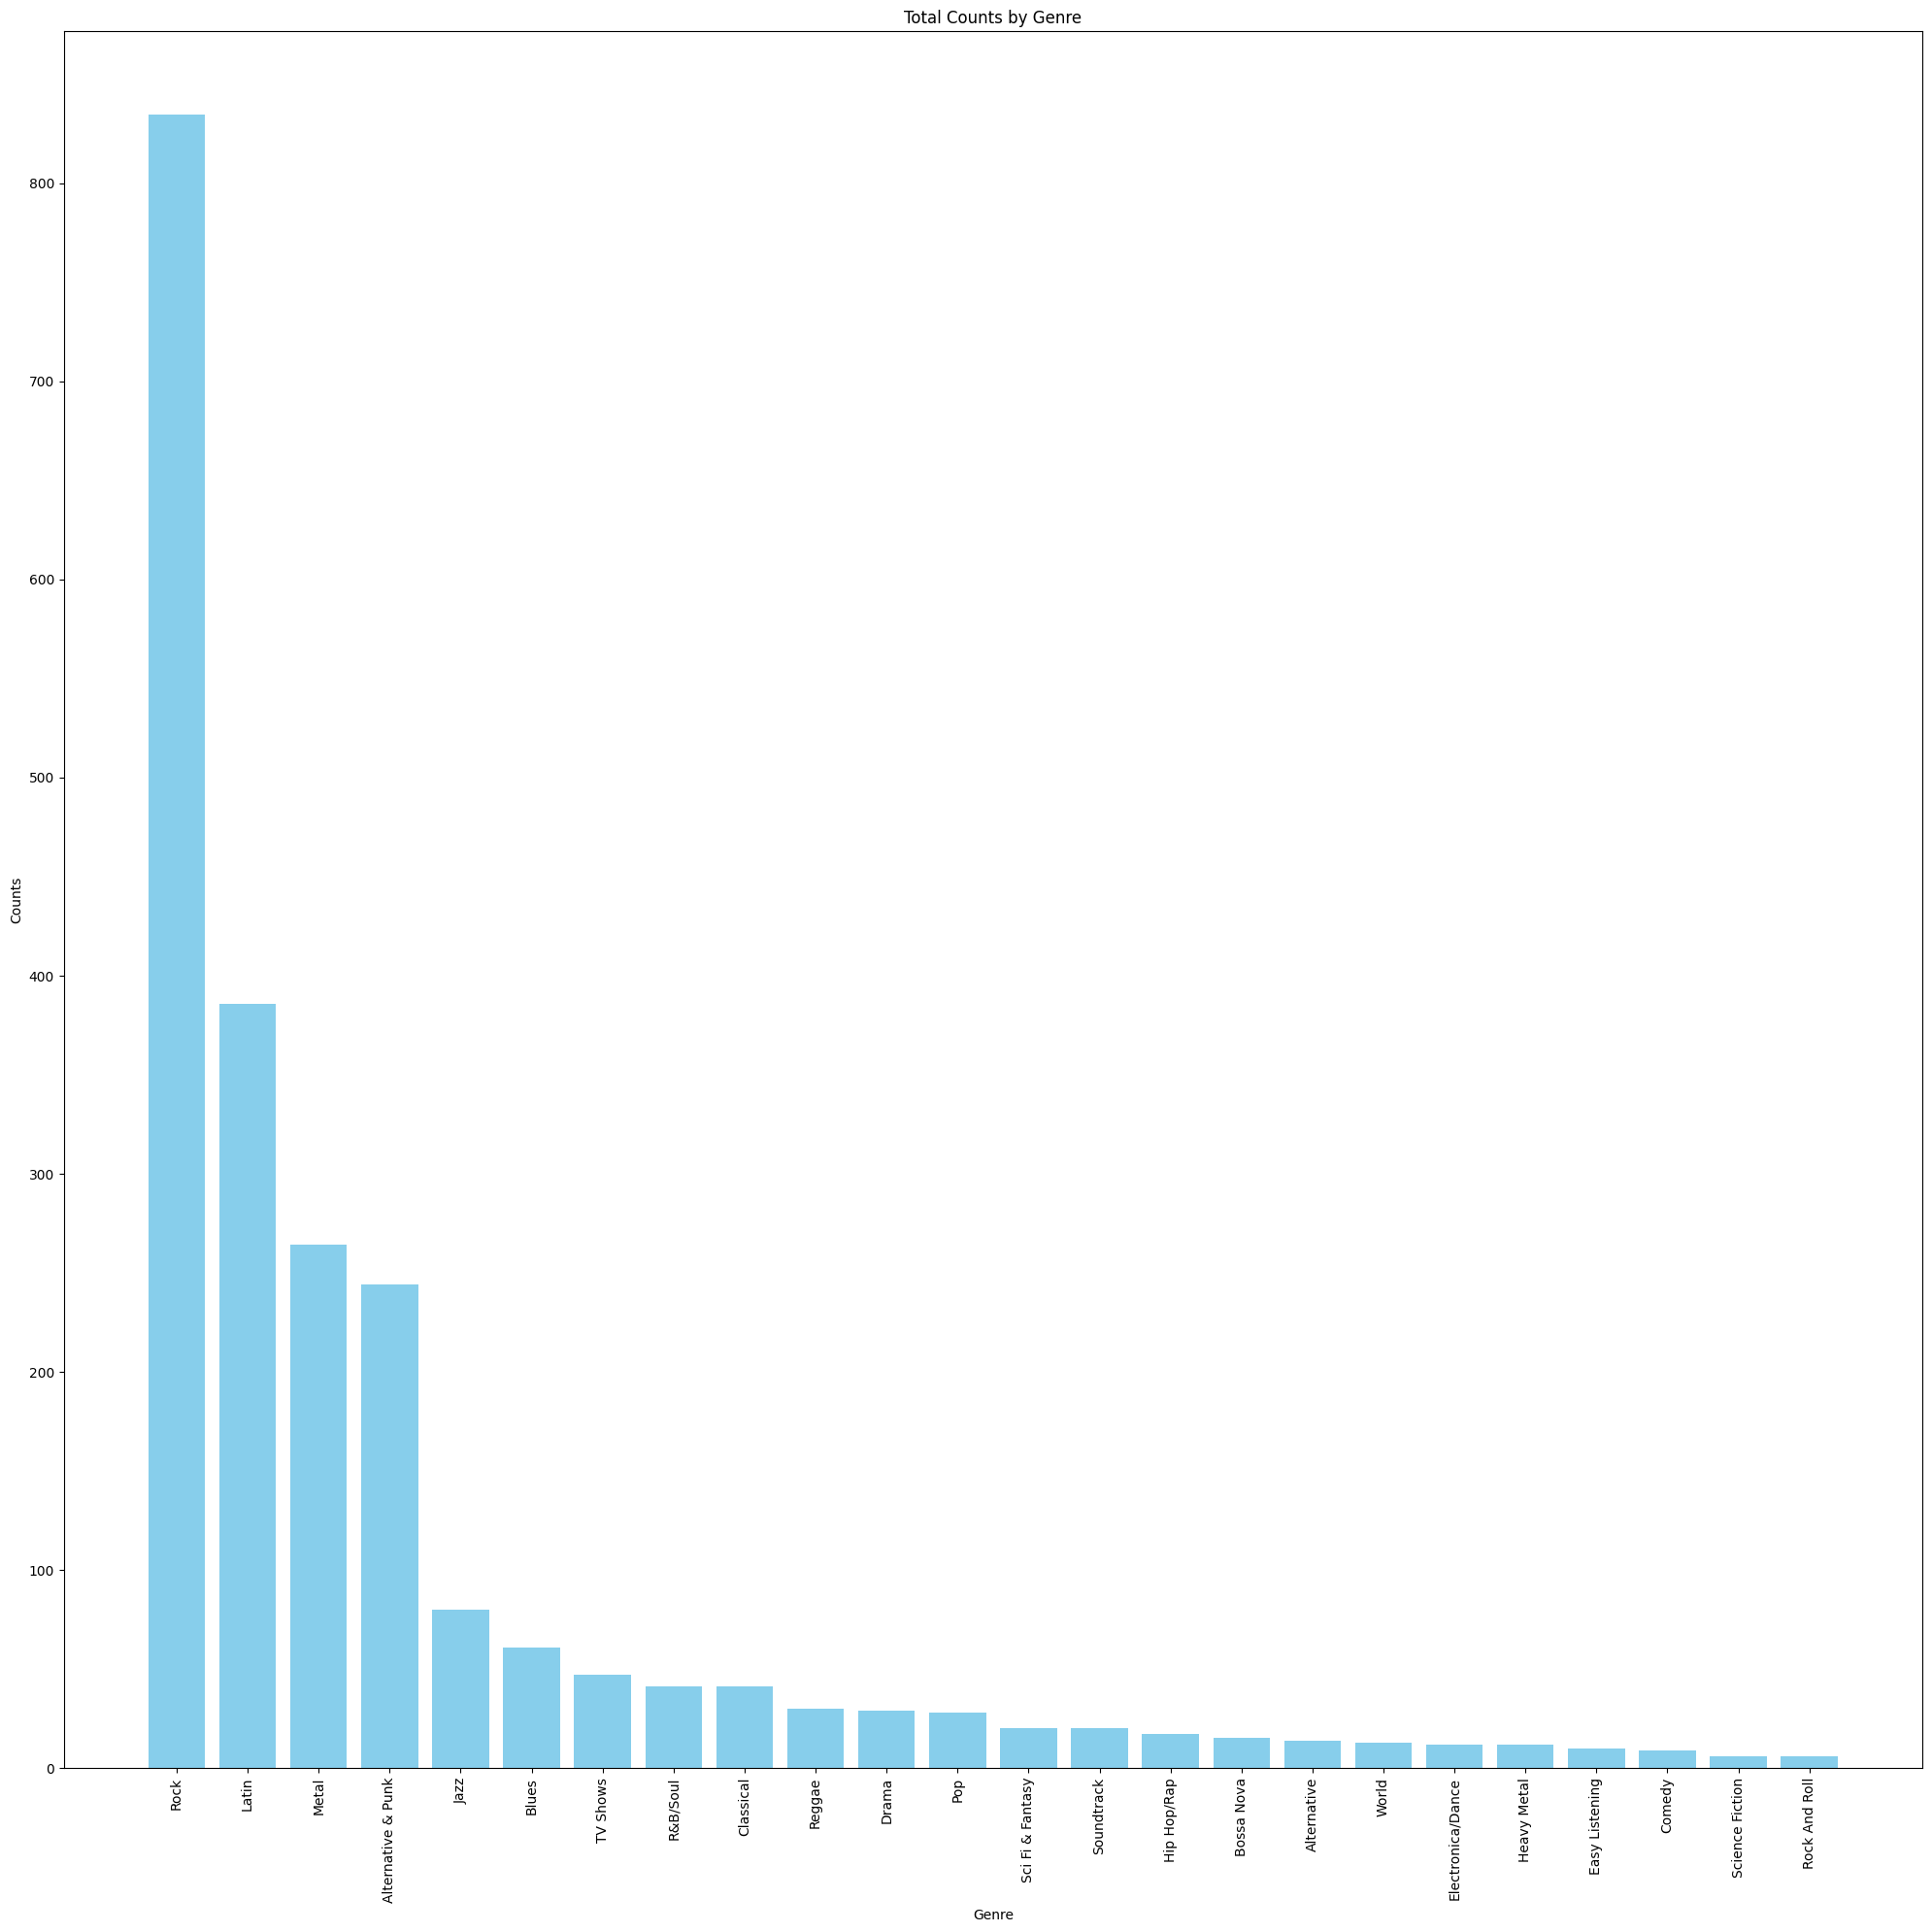

In [73]:
#Install and import plotting tools
!pip install pandas matplotlib seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Determine figure size
plt.figure(figsize=(20, 20))

# Sort the DataFrame by 'Count' in descending order
df_genre_count = df_genre_count.sort_values(by=['Count'], ascending=False)

# Use the existing DataFrame created in the previous cell to plot a bar graph
plt.bar(df_genre_count['Genre'], df_genre_count['Count'], color='skyblue')
plt.title('Total Counts by Genre')
plt.xlabel('Genre')
plt.ylabel('Counts')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [74]:
%%timeit
sum(df_genre_count['Count'])

8.61 µs ± 2.24 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [75]:
%%script sqlite3 --column --header chinook.db
SELECT COUNT(*)
FROM invoice_items ii
JOIN tracks t ON ii.TrackId = t.TrackId
WHERE t.GenreId IS NULL;


COUNT(*)
--------
0       


## EXTRA CREDIT:
* Use a CTE
* A query that JOINS two or more tables -- SEE ABOVE.
* Make a model to see if you can predict something
* Come up with something else cool to do with your data


In [81]:
%%script sqlite3 --column --header chinook.db
SELECT COUNT(*)
FROM invoice_items ii
JOIN tracks t ON ii.TrackId = t.TrackId
WHERE t.GenreId IS NULL;

COUNT(*)
--------
0       


In [77]:
#Can I query: do some employees sell more genres than others (their personal strength)?
#What JOINs can occur between tables with common features

In [84]:
%%script sqlite3 --column --header chinook.db
SELECT COUNT(*)
FROM invoice_items ii
JOIN tracks t ON ii.TrackId = t.TrackId
JOIN genres g on t.GenreID = g.GenreID
limit 10

COUNT(*)
--------
2240    
